In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('Dataset_Automobile - A_data.csv')

In [6]:
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [7]:
# Deleting the index column
df.drop(df.columns[0] , axis=1 , inplace = True)
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
56,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [8]:
# Show the count of the null values in the dataframme
df.isnull().sum()

company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [9]:
# Drop rows with null values
df.dropna(inplace=True)
df.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [10]:
#le nom et le prix de l'entreprise qui dispose de la voiture la plus chère
max_price = df['price'].max()
# Filtre the data
most_expensive_car = df.loc[df['price'] == max_price, ['company', 'price']]
most_expensive_car

,company,price
35,mercedes-benz,45400.0


In [11]:
#les données des voitures de la marque Toyota.
toyota_cars = df.loc[df['company'].str.lower() == 'toyota']
toyota_cars

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [12]:
#le nombre total des voitures par entreprise.
car_counts = df['company'].value_counts()
car_counts

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: company, dtype: int64

In [13]:
#la moyenne et l’écart type du prix des voitures.
# Calculer la moyenne du prix des voitures
average_price = df['price'].mean()
# Calculer l'écart type du prix des voitures
price_std = df['price'].std()
# Afficher la moyenne et l'écart type du prix des voitures
print("Moyenne du prix des voitures : ", average_price)
print("Écart type du prix des voitures : ", price_std)

Moyenne du prix des voitures :  15387.0
Écart type du prix des voitures :  11320.259841416759


In [14]:
#la voiture de prix luxe de chaque entreprise.
# Group the cars by company
luxury_cars = df.loc[df.groupby('company')['price'].idxmax()]
luxury_cars[['company', 'price']]

,company,price
1,alfa-romero,16500.0
6,audi,18920.0
11,bmw,41315.0
15,chevrolet,6575.0
16,dodge,6377.0
19,honda,12945.0
21,isuzu,6785.0
26,jaguar,36000.0
31,mazda,18344.0
35,mercedes-benz,45400.0


In [15]:
#la voiture avec le plus grand nombre de cylindres
# Créer un dictionnaire pour mapper les mots aux nombres correspondants
cylinder_mapping = {'four': 4, 'six': 6, 'eight': 8, 'two': 2, 'five': 5, 'three': 3, 'twelves':12}
# Convertir la colonne 'num-of-cylinders' en utilisant le mapping
df['num-of-cylinders'] = df['num-of-cylinders'].map(cylinder_mapping)
df.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,4.0,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,4.0,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6.0,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,4.0,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,5.0,115,18,17450.0


In [20]:
# Trouver la voiture avec le plus grand nombre de cylindres
car_with_most_cylinders = df.loc[df['num-of-cylinders'].idxmax() , ['company' , 'num-of-cylinders']]
car_with_most_cylinders

company             mercedes-benz
num-of-cylinders              8.0
Name: 34, dtype: object

In [21]:
# Trier le DataFrame par la colonne 'price' en ordre décroissant
sorted_df = df.sort_values('price', ascending=False)
# Afficher le DataFrame trié
sorted_df.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,mercedes-benz,hardtop,112.0,199.2,ohcv,8.0,184,14,45400.0
11,bmw,sedan,103.5,193.8,ohc,6.0,182,16,41315.0
34,mercedes-benz,sedan,120.9,208.1,ohcv,8.0,184,14,40960.0
46,porsche,convertible,89.5,168.9,ohcf,6.0,207,17,37028.0
12,bmw,sedan,110.0,197.0,ohc,6.0,182,15,36880.0


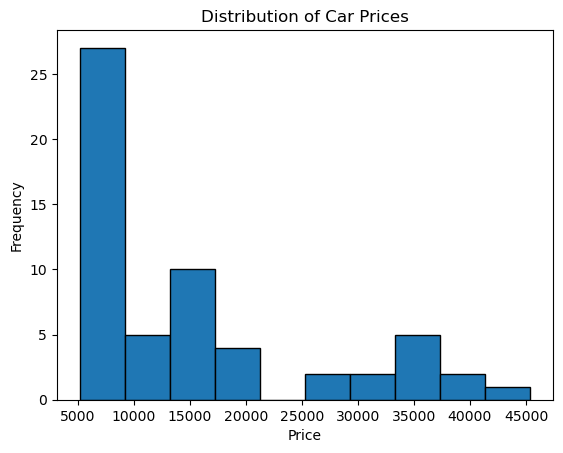

In [22]:
import matplotlib.pyplot as plt
# Créer un histogramme des prix des voitures
plt.hist(df['price'], bins=10, edgecolor='black')
# Ajouter des labels et un titre
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
# Afficher l'histogramme
plt.show()